# Modul 7 : Morfologi Citra

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## 1. Lakukanlah proses morfologi citra pada gambar tersebut (erosi, dilasi, opening, dan closing) dengan kernel berukuran 5 x 5 (semua nilai di dalamnya adalah 1)!

Text(0.5, 1.0, 'Original Image')

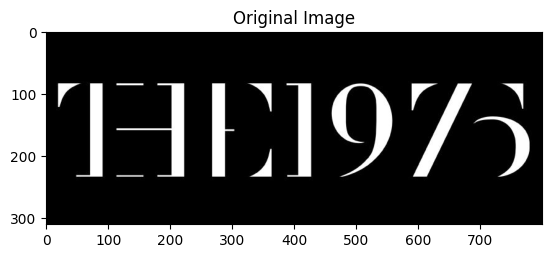

In [2]:
image = plt.imread('1975.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

#### Membuat kernel atau poros dengan ukuran 5x5 dengan semua nilai didalamnya adalah 1

In [3]:
kernel = np.array([
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1]
])

#### Membuat fungsi untuk mengkonversi gambar menjadi citra biner dikarenakan ketika melakukan operasi morfologi pada poros atau kernel nya bernilai 1 atau 0 yang menggambarkan suatu citra biner. untuk melakukan konversi kita perlu menentukan ambang batasnya yaitu 128 yang dimana ketika suatu piksel bernilai lebih dari 128 akan diberikan warna putih atau 255 jika piksel kurang dari atau sama dengan 128 maka piksel tersebut diberi nilai 0 atau warna hitam. pada function ini kita perlu menyiapkan variabel hasil dan kita perlu melakukan perulangan untuk mengakses semua piksel dari citra untuk melakukan pengecekan nilai pikselnya.

In [4]:
def toBiner(image):
    result = np.zeros(image.shape).astype(int)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if(image[i, j]>128):
                result[i, j] = 255
            elif (image[i, j]<=128):
                result[i,j] = 0
    return result
image = toBiner(image)

#### pada function berikut berfungsi untuk mendapatkan koordinat titik tengah suatu kernel atau poros yang telah diberikan, untuk mendapatkan nilai i kita perlu membagi 2 dari panjang baris dari suatu kernel begitu pula untuk nilai j kita perlu membagi dua panjang kolom dari kernel.

In [5]:
def getMidPointOf (kernel):
    i = (kernel.shape[1])//2
    j = (kernel.shape[0]-1)//2
    return i,j

### Dilasi

#### pada function berikut berfungsi untuk melakukan operasi dilasi pada suatu citra yang dimana kita perlu menyiapkan variabel untuk menyimpan nilai hasil kemudian untuk menyimpan nilai koordinat titik tengah dari kernel, pada opersi ini cara mengaksesnya sama seperti konvolusi jadi untuk dua perulangan pertama tidak akan melakukan perulangan sepanjang semua indeks dari citra namun dibatas dengan dikurangi dengan panjang dari kernel supaya mencegah terjadi indeks out of bound. pada proses dilasi ketika citra berada pada titik tengah pada jangkauan kernel tiap iterasi harus bernilai putih (255/1), jika itu terpenuhi maka pada koordinat tetangga dari kernel yang bernilai 1 maka pada citra yang dalam jangkauan kernel periterasi pada koordinat yang sama akan diubah menjadi 255 atau putih. pada operasi dilasi nantinya citra akan menjadi keliatan lebih tebal dari citra asli.

In [6]:
def dilasi(image, kernel):
    result = np.zeros(image.shape).astype(int)
    mid1 = getMidPointOf(kernel)[0]
    mid2 = getMidPointOf(kernel)[1]
    for i in range (image.shape[0]-kernel.shape[1]):
        for j in range (image.shape[1]-kernel.shape[0]):
            if(image[i+mid1,j+mid2])==255:
                for k in range (kernel.shape[0]):
                    for l in range (kernel.shape[1]):
                        if(kernel[k,l])==1:
                            result[i+k,j+l] = 255
    return result

### Erosi

#### pada function berikut berfungsi untuk melakukan operasi erosi pada suatu citra yang dimana kita perlu menyiapkan variabel untuk menyimpan nilai hasil kemudian untuk menyimpan nilai koordinat titik tengah dari kernel, pada opersi ini cara mengaksesnya sama seperti konvolusi jadi untuk dua perulangan pertama tidak akan melakukan perulangan sepanjang semua indeks dari citra namun dibatas dengan dikurangi dengan panjang dari kernel supaya mencegah terjadi indeks out of bound. pada proses erosi ketika citra berada pada titik tengah pada jangkauan kernel tiap iterasi harus bernilai putih (255/1), jika itu terpenuhi maka pada koordinat tetangga dari kernel yang bernilai 1 maka pada citra yang dalam jangkauan kernel periterasi pada koordinat yang sama harus juga bernilai 255 atau warna putih jika tidak memenuhi walaupun hanya satu piksel maka secara otomatis titik tengah citra tersebut pada jangkauan kernel periterasi tersebut akan langsung diubah nilainya menjadi 0 atau hitam, setelah itu tidak perlu melakukan pengecekan lagi pada tetangga lain pada satu iterasi tersebut dan akan dilanjutkan ke iterasi selanjutnya.

In [7]:
def erosi(image, kernel):
    result = np.zeros(image.shape).astype(int)
    mid1 = getMidPointOf(kernel)[0]
    mid2 = getMidPointOf(kernel)[1]
    for i in range (image.shape[0]-kernel.shape[1]):
        for j in range (image.shape[1]-kernel.shape[0]):
            if(image[i+mid1,j+mid2])==255:
                result[i+mid1,j+mid2]=255
                for k in range (kernel.shape[0]):
                    for l in range (kernel.shape[1]):
                        if(kernel[k,l])==1 and (image[i+k,j+l]!=255):
                            result[i+mid1,j+mid2]=0
    return result

### Opening

#### pada function berikut berfungsi untuk melakukan operasi opening pada citra yang dimana pada operasi opening suatu citra dilakukan operasi erosi terlebih dahulu setelah itu dilakukan operasi dilasi. jadi pada function ini kita hanya perlu memanggil function dilasi dan erosi yang telah dibuat sebelumnya

In [8]:
def opening(image, kernel):
    result = erosi(image, kernel)
    result = dilasi(result, kernel)
    return result

### Closing

#### pada function berikut berfungsi untuk melakukan operasi closing pada citra yang dimana pada operasi closing suatu citra dilakukan operasi dilasi terlebih dahulu setelah itu dilakukan operasi erosi. jadi pada function ini kita hanya perlu memanggil function dilasi dan erosi yang telah dibuat sebelumnya

In [9]:
def closing(image, kernel):
    result = dilasi(image, kernel)
    result = erosi(result, kernel)
    return result

Text(0.5, 1.0, 'Closing')

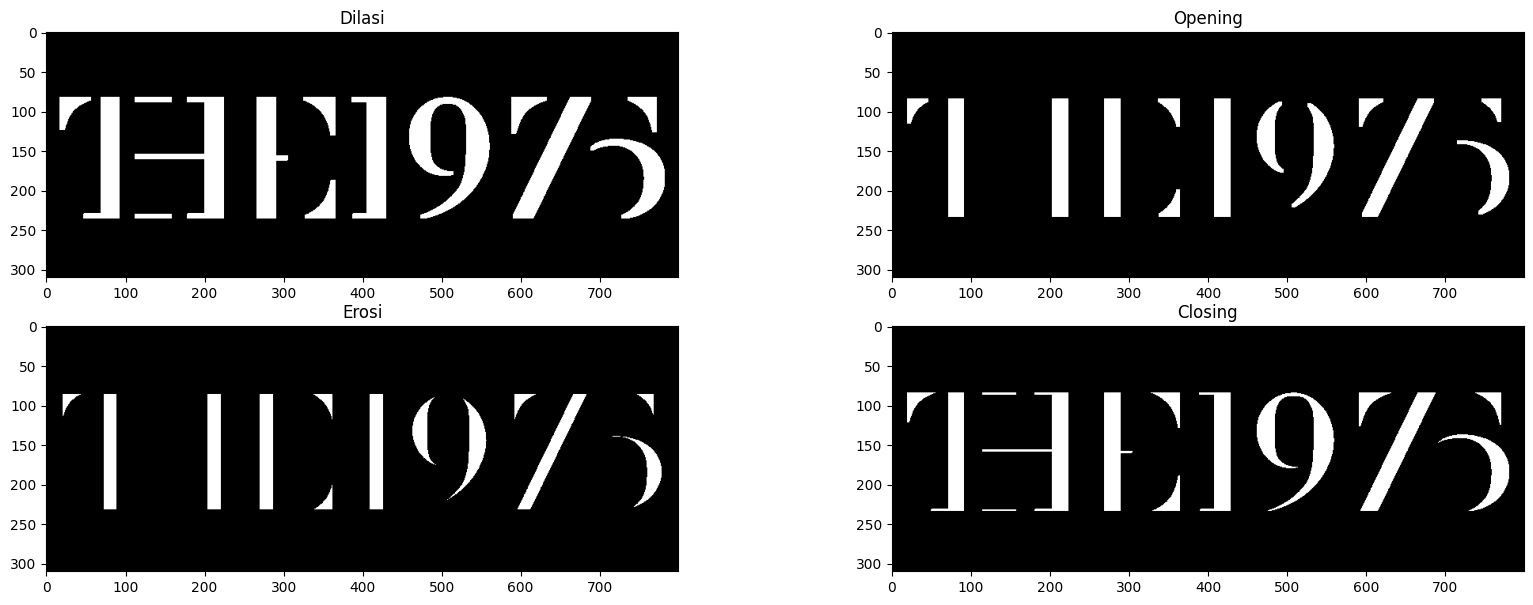

In [10]:
imgDilasi = dilasi(image,kernel)
imgErosi = erosi(image,kernel)
imgOpening = opening(image,kernel)
imgClosing = closing(image,kernel)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,7))
ax[0][0].imshow(imgDilasi, cmap="gray")
ax[0][0].set_title('Dilasi')
ax[1][0].imshow(imgErosi, cmap="gray")
ax[1][0].set_title('Erosi')
ax[0][1].imshow(imgOpening, cmap="gray")
ax[0][1].set_title('Opening')
ax[1][1].imshow(imgClosing, cmap="gray")
ax[1][1].set_title('Closing')

## 2. lakukanlah proses morfologi citra jenis gradien morfologi pada citra dengan kernel yang sama

#### untuk mendapatkan citra hasil gradien morfologi dengan berdasarkan citra dan kernel yang telah dibuat sebelumnya kita hanya perlu mencari selisih dari hasil dilasi dengan erosi yang telah didapatkan yang dimana kita hanya perlu melakukan pengurangan citra hasil dilasi dengan citra hasil erosi

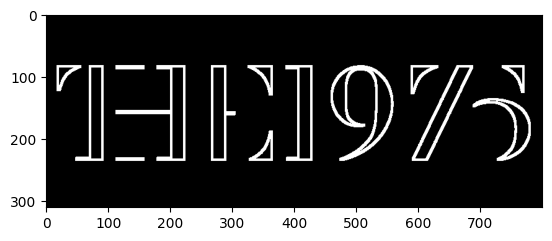

In [11]:
gradient = imgDilasi-imgErosi
plt.imshow(gradient, cmap="gray")